In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set()
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
import sklearn.preprocessing

Read CSV file

In [102]:
raw_data = pd.read_csv('heart.csv')

In [103]:
raw_data.head(50)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Some Data Verification steps

In [104]:
raw_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [105]:
raw_data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [106]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


LOGISTIC REGRESSION MODEL V1

In [107]:

data = pd.get_dummies(raw_data)

In [108]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [109]:
data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [110]:
#Checking Correlation between the columns
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.055750,0.166607,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.005133,0.048824,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.200092,-0.120531,0.150954,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.120076,0.131176,-0.140514,-0.039249,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.189186,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.105734,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.305445,0.516716,-0.401924,-0.212964,-0.054790,0.010670,-0.091580,0.102527,-0.494282,0.494282,0.122527,0.554134,-0.622164
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-1.000000,-0.183876,0.161522,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-1.000000,1.000000,0.183876,-0.161522,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,-0.183876,0.183876,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443


Plotting Triangular heatmap for the Correlation

<AxesSubplot:>

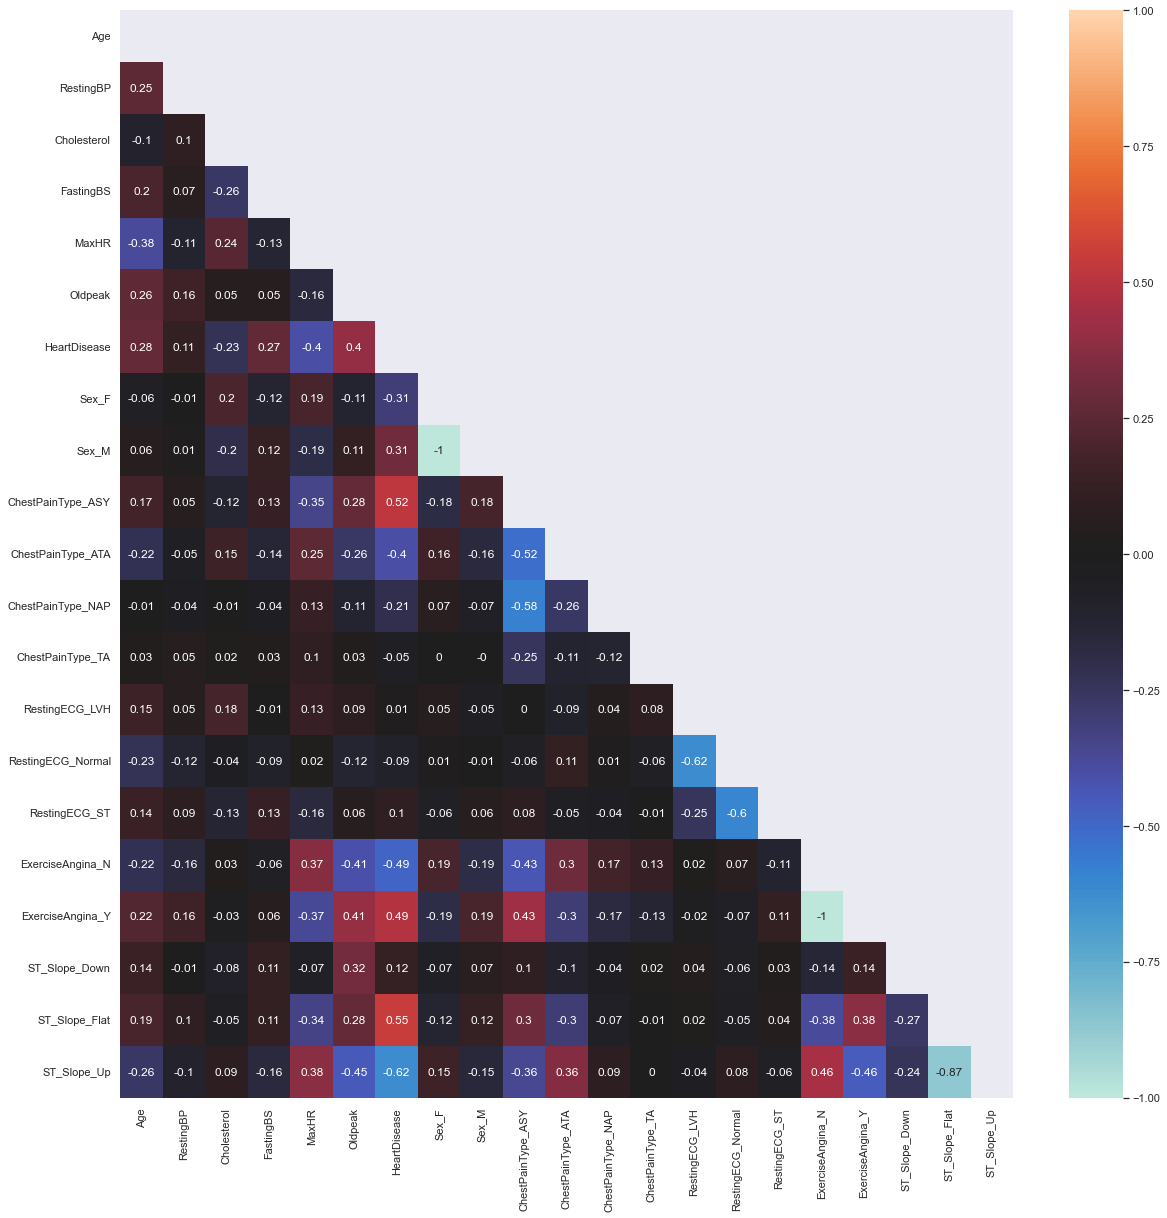

In [111]:
plt.subplots(figsize=(20,20))
corr_coef = data.corr().round(2)
mask = np.zeros_like(corr_coef)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_coef,mask=mask,vmin=-1,vmax=1,center=0,annot=True)

In [112]:
raw_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [113]:
columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']

In [114]:
raw_data.groupby('HeartDisease')['Age'].value_counts()


HeartDisease  Age
0             54     28
              51     20
              41     18
              53     18
              52     17
                     ..
1             31      1
              33      1
              37      1
              73      1
              76      1
Name: Age, Length: 95, dtype: int64

DATA ANALYSIS - BOXPLOTS,PAIRPLOTS,SCATTERPLOTS

<AxesSubplot:xlabel='Cholesterol'>

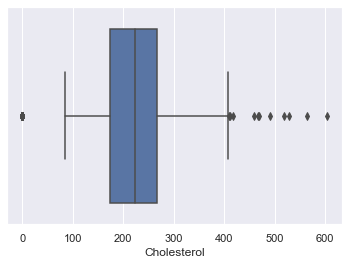

In [115]:
sns.boxplot(x=raw_data['Cholesterol'])

<AxesSubplot:xlabel='Age'>

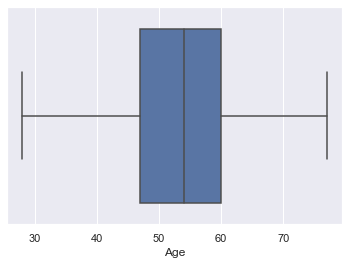

In [116]:
sns.boxplot(x=raw_data['Age'])

<AxesSubplot:xlabel='RestingBP'>

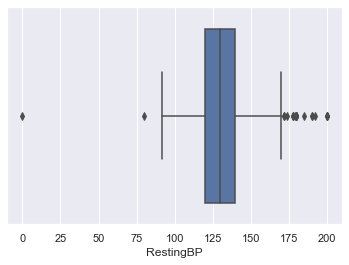

In [117]:
sns.boxplot(x=raw_data['RestingBP'])

<AxesSubplot:xlabel='MaxHR'>

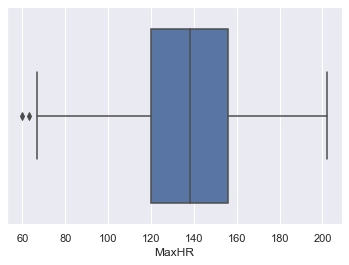

In [118]:
sns.boxplot(x=raw_data['MaxHR'])

<AxesSubplot:xlabel='Oldpeak'>

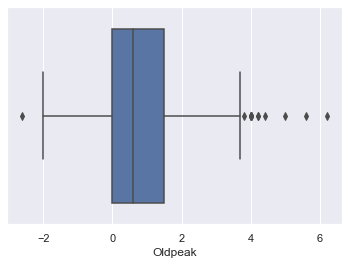

In [119]:
sns.boxplot(x=raw_data['Oldpeak'])

In [120]:
raw_data[raw_data['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


In [121]:
raw_data[raw_data['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [122]:
raw_data[raw_data['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [123]:
raw_data[raw_data['Cholesterol']!=0].mean()

C:\Users\karmalic\AppData\Local\Temp/ipykernel_19132/4053298060.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  raw_data[raw_data['Cholesterol']!=0].mean()


Age              52.882038
RestingBP       133.022788
Cholesterol     244.635389
FastingBS         0.167560
MaxHR           140.226542
Oldpeak           0.901609
HeartDisease      0.477212
dtype: float64

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

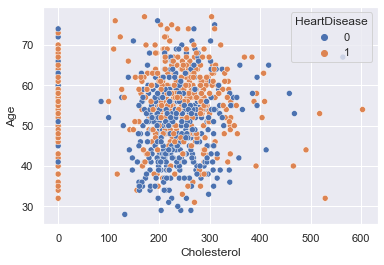

In [124]:
sns.scatterplot(x=raw_data['Cholesterol'],y=raw_data['Age'],hue=raw_data['HeartDisease'])

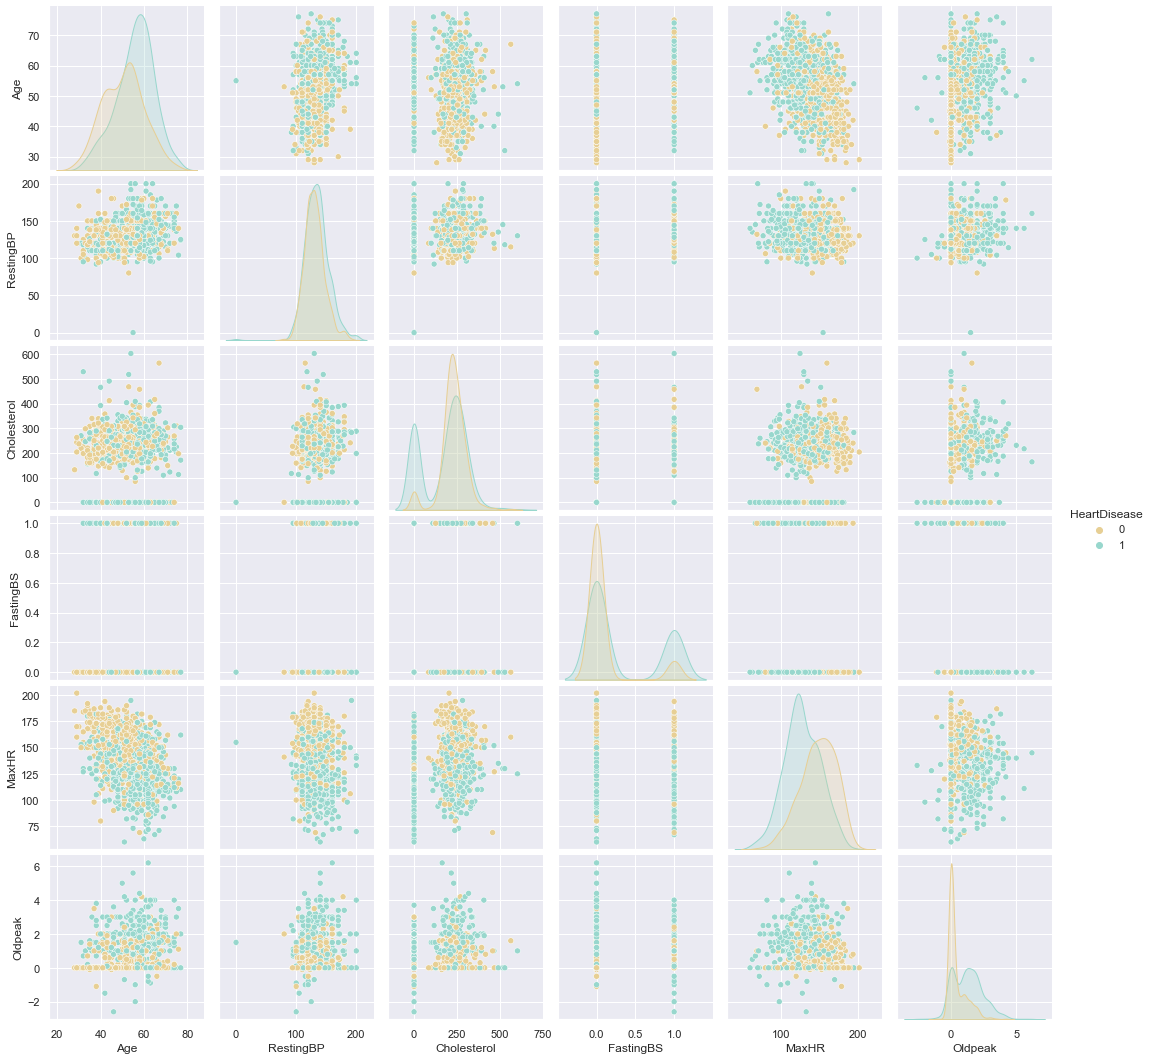

In [125]:

sns.pairplot(raw_data[columns],hue='HeartDisease',palette='BrBG')

Standardization using RobustScaler. Used for data especially with outliers

In [129]:
robust_scaler = RobustScaler()
data[['Age','RestingBP','Cholesterol','MaxHR']] = robust_scaler.fit_transform(data[['Age','RestingBP','Cholesterol','MaxHR']])

In [130]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.704000,0,0.944444,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.384615,1.5,-0.458667,0,0.500000,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.307692,0.0,0.640000,0,-1.111111,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.461538,0.4,-0.096000,0,-0.833333,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.000000,1.0,-0.298667,0,-0.444444,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,0,-0.166667,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,1.076923,0.7,-0.320000,1,0.083333,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0.230769,0.0,-0.981333,0,-0.638889,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,0.230769,0.0,0.138667,0,1.000000,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [131]:
df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=42)

In [132]:
log_reg = LogisticRegression()
pipe = make_pipeline(log_reg)


In [133]:
df_train.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [134]:
x_train = df_train.drop(['HeartDisease'],axis=1)
y_train = df_train['HeartDisease']
h = pipe.fit(x_train,y_train)

In [135]:
x_test = df_test.drop(['HeartDisease'],axis=1)
y_test = df_test['HeartDisease']

In [136]:
predictions = pipe.predict(x_test)

In [137]:
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [138]:
y_test

668    0
30     1
377    1
535    1
807    0
      ..
133    1
813    0
734    1
360    1
875    0
Name: HeartDisease, Length: 276, dtype: int64

In [147]:
y_predictions = pd.DataFrame(predictions,columns=['Predictions'])
y_predictions['Actual'] = y_test.values
y_predictions


,Predictions,Actual
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,0,0
273,1,1
274,1,1


In [148]:
y_predictions

,Predictions,Actual
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,0,0
273,1,1
274,1,1


In [149]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_predictions['Actual'],y_predictions['Predictions'])
cnf_matrix

array([[ 99,  13],
       [ 20, 144]], dtype=int64)

In [150]:
244/276

0.8840579710144928

In [197]:
raw_data[raw_data['Oldpeak']>=0].mean()

C:\Users\karmalic\AppData\Local\Temp/ipykernel_5772/300094421.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  raw_data[raw_data['Oldpeak']>=0].mean()


Age                53.530387
Sex                 0.213260
RestingBP         132.659669
Cholesterol       244.615470
FastingBS           0.227624
MaxHR             136.988950
ExerciseAngina      0.406630
Oldpeak             0.914254
HeartDisease        0.551381
dtype: float64

In [151]:
raw_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [185]:
data_preprocessed = raw_data.copy()

Finding Mean of Cholesterol grouped by Heart Disease

In [186]:
data_preprocessed.where(data_preprocessed['Cholesterol']!=0).groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0.0,50.171795,130.164103,238.769231,0.110256,149.058974,0.393846
1.0,55.851124,136.154494,251.061798,0.230337,130.550562,1.457865


Setting the outliers by the mean values

In [187]:

data_preprocessed.loc[(data_preprocessed['HeartDisease']==0) & (data_preprocessed['Cholesterol']>456) ,'Cholesterol'] = 238
data_preprocessed.loc[(data_preprocessed['HeartDisease']==1) & (data_preprocessed['Cholesterol']>456) ,'Cholesterol'] = 251
data_preprocessed.loc[(data_preprocessed['HeartDisease']==0) & (data_preprocessed['Cholesterol']<78) ,'Cholesterol'] = 238
data_preprocessed.loc[(data_preprocessed['HeartDisease']==1) & (data_preprocessed['Cholesterol']<78) ,'Cholesterol'] = 251

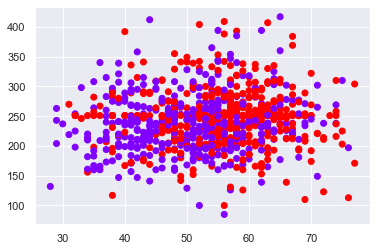

In [188]:
plt.scatter(data_preprocessed['Age'],data_preprocessed['Cholesterol'],c=data['HeartDisease'],cmap='rainbow')

In [189]:
data_preprocessed[data_preprocessed['HeartDisease']==1].mean()


C:\Users\karmalic\AppData\Local\Temp/ipykernel_19132/3696615645.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_preprocessed[data_preprocessed['HeartDisease']==1].mean()


Age              55.899606
RestingBP       134.185039
Cholesterol     248.381890
FastingBS         0.334646
MaxHR           127.655512
Oldpeak           1.274213
HeartDisease      1.000000
dtype: float64

Oldpeak cannot be negative.

In [190]:
data_preprocessed['Oldpeak'].loc[data_preprocessed['Oldpeak'] <0] = (data_preprocessed['Oldpeak'].loc[data_preprocessed['Oldpeak'] <0]) * -1

c:\Users\karmalic\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [191]:
data_preprocessed[data_preprocessed['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [193]:
data_preprocessed.groupby(['ST_Slope','RestingECG'])['Oldpeak'].mean()

ST_Slope  RestingECG
Down      LVH           2.670588
          Normal        2.041935
          ST            2.126667
Flat      LVH           1.285567
          Normal        1.159774
          ST            1.311340
Up        LVH           0.440541
          Normal        0.296863
          ST            0.468182
Name: Oldpeak, dtype: float64

In [194]:
data_preprocessed

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Categorical columns conversion

In [195]:
data_preprocessed['Sex'] = data_preprocessed['Sex'].map({'M':0,'F':1})

In [196]:
data_preprocessed['ExerciseAngina'] = data_preprocessed['ExerciseAngina'].map({'N':0,'Y':1})

In [197]:
data_preprocessed = pd.get_dummies(data_preprocessed,drop_first=True)

In [198]:
data_preprocessed['Oldpeak'][data_preprocessed['Oldpeak']<0]

Series([], Name: Oldpeak, dtype: float64)

In [199]:
data_preprocessed

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,1,1,0,1,0
914,68,0,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0
915,57,0,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0
916,57,1,130,236,0,174,0,0.0,1,1,0,0,0,0,1,0


STANDARDIZATION - Standard Scaler

In [203]:
stand_scaler = sklearn.preprocessing.StandardScaler()
data_preprocessed[['Age','RestingBP','Cholesterol','MaxHR']] = stand_scaler.fit_transform(data_preprocessed[['Age','RestingBP','Cholesterol','MaxHR']])

In [204]:
#Standardized Data
data_preprocessed

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0,0.410909,0.975486,0,1.382928,0,0.0,0,1,0,0,1,0,0,1
1,-0.478484,1,1.491752,-1.347433,0,0.754157,0,1.0,1,0,1,0,1,0,1,0
2,-1.751359,0,-0.129513,0.847619,0,-1.525138,0,0.0,0,1,0,0,0,1,0,1
3,-0.584556,1,0.302825,-0.622853,0,-1.132156,1,1.5,1,0,0,0,1,0,1,0
4,0.051881,0,0.951331,-1.027766,0,-0.581981,0,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0,-1.210356,0.442706,0,-0.188999,0,1.2,1,0,0,1,1,0,1,0
914,1.536902,0,0.627078,-1.070388,1,0.164684,0,3.4,1,0,0,0,1,0,1,0
915,0.370100,0,-0.129513,-2.391681,0,-0.857069,1,1.2,1,0,0,0,1,0,1,0
916,0.370100,1,-0.129513,-0.154007,0,1.461525,0,0.0,1,1,0,0,0,0,1,0


In [205]:
df_trainmodel2,df_testmodel2 = train_test_split(data_preprocessed,train_size=0.7,test_size=0.3,random_state=42)

In [206]:
X_trainmodel2 = df_trainmodel2.loc[:,df_trainmodel2.columns!='HeartDisease']
y_trainmodel2 = df_trainmodel2['HeartDisease']

In [207]:
x_testmodel2 = df_testmodel2.loc[:,df_testmodel2.columns!='HeartDisease']
y_testmodel2 = df_testmodel2['HeartDisease']

In [208]:
X_trainmodel2

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
712,0.476173,0,-1.750778,-0.196629,0,0.754157,0,0.1,0,0,0,1,0,0,1
477,0.794391,0,-1.210356,0.165661,1,-1.132156,1,2.0,0,0,0,1,0,0,0
409,-0.054192,0,1.491752,0.165661,1,-0.581981,1,0.0,0,1,0,0,0,1,0
448,1.006537,0,1.491752,-0.281874,1,-1.250051,1,1.0,0,0,0,1,0,1,0
838,1.006537,0,-0.129513,1.849244,1,-0.188999,1,1.8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.584556,1,-0.669935,0.229594,0,-1.053560,0,0.0,0,0,0,0,1,0,1
270,-0.902775,0,-0.669935,-0.388430,0,0.125386,0,0.0,0,0,0,1,0,0,1
860,0.688318,0,-0.129513,0.208283,0,0.282579,1,1.4,0,0,0,1,0,0,1
435,0.688318,0,1.059415,-0.111385,0,-0.739174,1,0.0,0,0,0,0,1,0,1


In [209]:
log_regmodel2 = LogisticRegression()

In [210]:
log_regmodel2.fit(X_trainmodel2,y_trainmodel2)

LogisticRegression()

In [211]:
results = log_regmodel2.predict(x_testmodel2)

In [212]:
results

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [213]:
#log_regmodel2.score(X_trainmodel2,y_trainmodel2)
log_regmodel2.score(x_testmodel2,y_testmodel2)

0.8731884057971014

old model with cholestrol as mean 244 = 0.8623188405797102 score

In [214]:
pred_model2 = pd.DataFrame(results,columns=['Predictions'])
pred_model2['Actual'] = y_testmodel2.values
pred_model2

,Predictions,Actual
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
271,1,1
272,0,0
273,1,1
274,1,1


In [215]:
from sklearn.metrics import confusion_matrix

In [216]:
confusion_matrix(pred_model2['Actual'],pred_model2['Predictions'])

array([[100,  12],
       [ 23, 141]], dtype=int64)